### Importing libraries


In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Data importing and Preprocessing

In [90]:
#Import the Dataset
df= pd.read_csv(r"E:\Courses\...ML\Gradiant descent\Grediant\Phishing_Email.csv")
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


In [92]:
df["Unnamed: 0"].value_counts()

Unnamed: 0
18650    1
0        1
1        1
2        1
3        1
        ..
14       1
13       1
12       1
11       1
10       1
Name: count, Length: 18650, dtype: int64

In [93]:
# Check NAN values
df.isna().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [94]:
#Drop tha Na values
df = df.dropna()
print(df.isna().sum())

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64


In [95]:
#dataset shape
df.shape

(18634, 3)

In [96]:
# Count the occurrences of each E-mail type.
email_type_counts = df['Email Type'].value_counts()
print(email_type_counts)


Email Type
Safe Email        11322
Phishing Email     7312
Name: count, dtype: int64


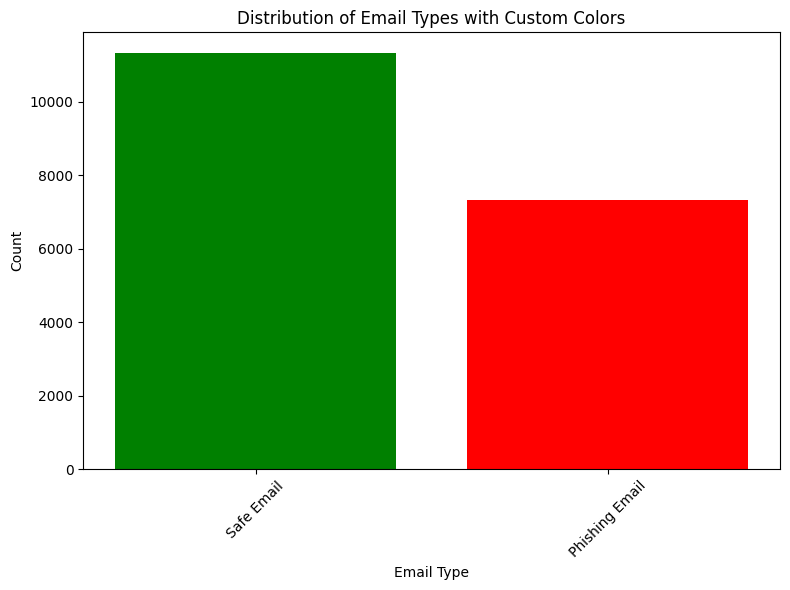

In [97]:
# Create the bar chart
# Create a list of unique email types
unique_email_types = email_type_counts.index.tolist()

# Define a custom color map
color_map = {
    'Phishing Email': 'red',
    'Safe Email': 'green',}

# Map the colors to each email type
colors = [color_map.get(email_type, 'gray') for email_type in unique_email_types]

# Create the bar chart with custom colors
plt.figure(figsize=(8, 6))
plt.bar(unique_email_types, email_type_counts, color=colors)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Email Types with Custom Colors')
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()


In [98]:
count = Counter(df["Email Type"])
print(f"Before undersample : {count}")

Before undersample : Counter({'Safe Email': 11322, 'Phishing Email': 7312})


In [99]:
# We will use undersapling technique
Safe_Email = df[df["Email Type"]== "Safe Email"]
Phishing_Email = df[df["Email Type"]== "Phishing Email"]
Safe_Email = Safe_Email.sample(Phishing_Email.shape[0])

In [100]:
# lets check the sahpe again
Safe_Email.shape,Phishing_Email.shape

((7312, 3), (7312, 3))

In [101]:
# lest create a new Data with the balanced E-mail types
Data= pd.concat([Safe_Email, Phishing_Email], ignore_index = True)
Data = df.drop("Unnamed: 0", axis=1)
Data.head()


,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [102]:

X = Data["Email Text"].values
y = Data["Email Type"].values

### Our Dataset is ready

In [103]:
# lets splitting Our Data
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Build RandomForestClassifier Model


In [104]:
# Importing Libraries for the model ,Tfidf and Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# define the Classifier
classifier = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",RandomForestClassifier(n_estimators=50, max_depth=40))])# add another hyperparamters as U want

In [105]:
# Trian Our model
classifier.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier',
                 RandomForestClassifier(max_depth=40, n_estimators=50))])

In [106]:
# Prediction
y_pred = classifier.predict(x_test)

### Check the Accuracy

In [107]:
# Importing classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [108]:
classification_report(y_test,y_pred)


'                precision    recall  f1-score   support\n\nPhishing Email       0.95      0.90      0.92      2174\n    Safe Email       0.94      0.97      0.95      3417\n\n      accuracy                           0.94      5591\n     macro avg       0.95      0.93      0.94      5591\n  weighted avg       0.94      0.94      0.94      5591\n'

In [109]:
#accuracy_score of RandomForest
accuracy_score(y_test,y_pred)


0.9427651582901091

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics

# Initialize the Gradient Boosting Classifier within a pipeline
GBClassifier = Pipeline([("tfidf",TfidfVectorizer() ),("classifier",GradientBoostingClassifier(n_estimators=100, random_state=0))])

# Fit the model
GBClassifier.fit(X_train, y_train)

# Make predictions
GBpred = GBClassifier.predict(x_test)

# Calculate and print accuracy
print("Accuracy of Gradient Boosting model is:", metrics.accuracy_score(GBpred, y_test))

Accuracy of Gradient Boosting model is: 0.9322124843498479


### Build SVM Model